# 5.Grouping and Aggregration

## Challenge 5.1) Three step process to group and aggregrate data
+ Study customers based on Purchases (products)
+ find average amount of products purchased based on each marital status group

In [1]:
import pandas as pd

In [6]:
df = pd.read_csv('data/marketing_campaign.csv', sep='\t')

In [7]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Average amount of each product bought by each group of customers

In [8]:
amount_bought = [
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds'
]

In [10]:
df.groupby('Marital_Status')[amount_bought].mean()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Marital_Status,,,,,,
Absurd,355.500000,84.500000,312.500000,205.500000,30.500000,204.000000
Alone,184.666667,4.000000,26.333333,7.666667,7.000000,27.000000
Divorced,324.844828,27.426724,150.206897,35.043103,26.818966,46.288793
Married,299.480324,25.734954,160.681713,35.380787,26.701389,42.822917
Single,288.331250,26.835417,182.108333,38.216667,27.262500,43.729167
Together,306.825862,25.350000,168.103448,38.991379,26.122414,42.994828
Widow,369.272727,33.090909,189.285714,51.389610,39.012987,56.766234
YOLO,322.000000,3.000000,50.000000,4.000000,3.000000,42.000000


-------

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

## 5.2) Group Aggregrate Multiple Columns

+ Medium income of customers Education and Marital Status

### Medium Income by Education

In [24]:
df.groupby('Education').median()['Income'].sort_values()

Education
Basic         20744.0
2n Cycle      46805.0
Master        50943.0
Graduation    52028.5
PhD           55212.0
Name: Income, dtype: float64

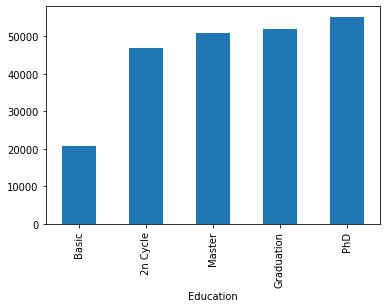

In [25]:
df.groupby('Education').median()['Income'].sort_values().plot(kind='bar');

### Medium Income by Marital_Status

In [26]:
df.groupby('Marital_Status').mean()['Income']

Marital_Status
Absurd      72365.500000
Alone       43789.000000
Divorced    52834.228448
Married     51724.978996
Single      50995.350318
Together    53245.534031
Widow       56481.552632
YOLO        48432.000000
Name: Income, dtype: float64

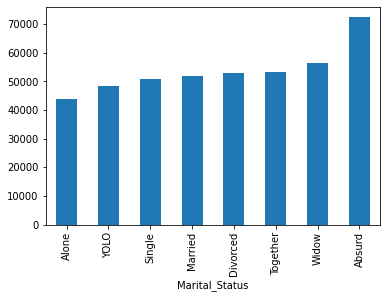

In [29]:
df.groupby('Marital_Status').mean()['Income'].sort_values().plot(kind='bar');

## Median Income by Education and Martital_Status

In [35]:
df.groupby(['Education', 'Marital_Status'])['Income'].agg(['mean', 'median'])

mean   median
Education  Marital_Status                       
2n Cycle   Divorced        49395.130435  49118.0
           Married         46201.100000  46462.5
           Single          53673.944444  48668.5
           Together        44736.410714  45774.0
           Widow           51392.200000  47682.0
Basic      Divorced         9548.000000   9548.0
           Married         21960.500000  22352.0
           Single          18238.666667  16383.0
           Together        21240.071429  23179.0
           Widow           22123.000000  22123.0
Graduation Absurd          79244.000000  79244.0
           Alone           34176.000000  34176.0
           Divorced        54526.042017  55635.0
           Married         50800.258741  50737.0
           Single          51322.182927  49973.5
           Together        55758.480702  53977.0
           Widow           54976.657143  58275.0
Master     Absurd          65487.000000  65487.0
           Alone           61331.000000  61331.0
           Divorced        50331.945946  49476.0
           Married         53286.028986  53088.5
           Single          53530.560000  49494.0
           Together        52109.009804  49736.0
           Widow           58401.545455  51529.0
PhD        Alone           35860.000000  35860.0
           Divorced        53096.615385  50613.5
           Married         58138.031579  57081.5
           Single          53314.614583  50198.0
           Together        56041.422414  56756.0
           Widow           60288.083333  57032.0
           YOLO            48432.000000  48432.0

-------

## Challenge 5.3) Apply Custom Aggregrate Function

+ Find Top Purchasers among Customer Groups
+ Display Top 5 online purchasers from each group based on Education level

In [37]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [105]:
def get_top_online_purchasers(x, number_of_customers=5, platform='NumWebPurchases'):
    return x.sort_values(by='NumWebPurchases', ascending=False)[:number_of_customers]

In [106]:
# test the function
get_top_online_purchasers(df, 5, 'NumWebPurchases')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
1898,4619,1945,PhD,Single,113734.0,0,0,28-05-2014,9,6,...,1,0,0,0,0,0,0,3,11,0
1975,10311,1969,Graduation,Married,4428.0,0,1,05-10-2013,0,16,...,1,0,0,0,0,0,0,3,11,0
1806,6237,1966,PhD,Single,7144.0,0,2,07-12-2013,92,81,...,0,0,0,0,0,0,0,3,11,0
1022,6059,1953,PhD,Together,64504.0,1,2,04-03-2013,81,986,...,7,0,0,0,0,0,0,3,11,1


In [107]:
# Categorize by Education Level

In [111]:
customer_purchases = ['NumWebPurchases','NumDealsPurchases',
       'NumCatalogPurchases', 'NumStorePurchases']

In [112]:
df.groupby(['Education']).apply(get_top_online_purchasers)[customer_purchases]

NumWebPurchases  NumDealsPurchases  NumCatalogPurchases  \
Education                                                                  
2n Cycle   2171               11                  1                    3   
           67                 11                  1                   10   
           797                11                  3                    4   
           1119               11                  5                    1   
           1507               11                  6                    8   
Basic      2013               11                  6                    2   
           1284                4                  2                    2   
           502                 4                  1                    1   
           1714                3                  2                    0   
           1220                3                  3                    1   
Graduation 27                 27                  0                    0   
           1975               25                  0                    0   
           1783               11                  2                    2   
           2145               11                  1                    3   
           718                11                  6                    5   
Master     18                 11                  2                    4   
           1539               11                  3                    2   
           131                11                  5                    1   
           992                10                  5                    1   
           2094               10                  4                    5   
PhD        1898               27                  0                    0   
           1806               23                  0                    1   
           2030               11                  2                    8   
           1252               11                  2                   10   
           932                11                  2                    2   

                 NumStorePurchases  
Education                           
2n Cycle   2171                 12  
           67                   10  
           797                   8  
           1119                  6  
           1507                  5  
Basic      2013                  8  
           1284                  5  
           502                   3  
           1714                  3  
           1220                  3  
Graduation 27                    0  
           1975                  0  
           1783                 10  
           2145                  4  
           718                   9  
Master     18                    9  
           1539                 12  
           131                   6  
           992                   6  
           2094                  7  
PhD        1898                  0  
           1806                  1  
           2030                  4  
           1252                 11  
           932                  10

-------

## Challenge 5.4) Calculate Stock returns for every year since 2003
+ daily and yearly stock returns for the orginizations

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
df = pd.read_csv('./data/stock_data.csv', index_col=0, parse_dates=True)

In [164]:
df.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2214 non-null   float64
 1   MSFT    2214 non-null   float64
 2   XOM     2214 non-null   float64
 3   SPX     2214 non-null   float64
dtypes: float64(4)
memory usage: 86.5 KB


In [166]:
df.describe()

,AAPL,MSFT,XOM,SPX
count,2214.000000,2214.000000,2214.000000,2214.000000
mean,125.516147,23.945452,59.558744,1183.773311
std,107.394693,3.255198,16.725025,180.983466
min,6.560000,14.330000,26.210000,676.530000
25%,37.135000,21.700000,49.492500,1077.060000
50%,91.455000,24.000000,62.970000,1189.260000
75%,185.605000,26.280000,72.510000,1306.057500
max,422.000000,34.070000,87.480000,1565.150000


### Daily Returns of the Stocks

In [169]:
daily_returns = df.pct_change().dropna()
daily_returns

,AAPL,MSFT,XOM,SPX
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086
2003-01-09,0.008242,0.029094,0.021159,0.019386
...,...,...,...,...
2011-10-10,0.051406,0.026286,0.036977,0.034125
2011-10-11,0.029526,0.002227,-0.000131,0.000544
2011-10-12,0.004747,-0.001481,0.011669,0.009795
2011-10-13,0.015515,0.008160,-0.010238,-0.002974


### Yearly Returns

In [172]:
get_year_func = lambda x : x.year

year_returns = daily_returns.groupby(get_year_func).sum()*100
year_returns

,AAPL,MSFT,XOM,SPX
2003,43.584872,6.898664,18.771676,21.552070
2004,118.442218,10.185021,25.943358,9.226193
2005,87.945329,0.095162,13.837245,3.483644
2006,23.832396,16.859259,34.845801,13.269720
2007,91.965795,21.529358,24.568472,4.740316
2008,-66.939672,-47.032987,-0.880614,-40.145891
2009,96.233386,54.235841,-10.095848,24.783483
2010,46.161592,-4.332628,11.263742,13.656375
2011,29.584961,1.784256,10.903390,-0.663912
